# Identifying Colors from RadarScope

In [1]:
%matplotlib inline

In [2]:
import blib

import numpy as np

import matplotlib
import matplotlib.image
import matplotlib.pyplot as plt

import PIL

np.set_printoptions(precision=4)

In [3]:
def contain(small, big):
    for s in big:
        if all(small == s):
            return True
    return False

def identify(file, oy='auto'):
    cc = matplotlib.image.imread(file)
    if oy == 'auto':
        oy = cc.shape[0] - 16
    im = np.zeros(cc.shape, dtype=np.uint8)
    im[:] = cc[:] * 255.0

    tab = []

    for x in range(cc.shape[1])[1:-1]:
        pix = im[oy, x, :]
        if not contain(pix, tab):
            tab.append(pix)
    
    return np.transpose(np.column_stack(tab))

In [4]:
cc = matplotlib.image.imread('blob/radarscope-z.png')
im = np.zeros(cc.shape, dtype=np.uint8)
im[:] = cc[:] * 255.0

In [5]:
oy = 328

tab = []

for x in range(cc.shape[1])[1:-1]:
    pix = im[oy, x, :]
#     print(f'{x}: {pix}')
    if not contain(pix, tab):
        tab.append(pix)
#     im[oy, x, :] = [0, 255, 0, 255]
    cc[oy, x, :] = [0, 1.0, 0, 1.0]

In [6]:
# pim = PIL.Image.fromarray(im)
# display(pim)

# pim = PIL.Image.fromarray(np.array(cc * 255.0, dtype=np.uint8))
# display(pim)

# Z - Reflectivity

In [7]:
z = identify('blob/radarscope-z.png')
z.shape

(254, 4)

In [8]:
# Inspect a snippet of the color codes
np.array(z[50:60, :], dtype=float) / 255.0

array([[0.5804, 0.5843, 0.4471, 1.    ],
       [0.5882, 0.5922, 0.4588, 1.    ],
       [0.6   , 0.6039, 0.4745, 1.    ],
       [0.6078, 0.6157, 0.4863, 1.    ],
       [0.6157, 0.6235, 0.5059, 1.    ],
       [0.6235, 0.6314, 0.5176, 1.    ],
       [0.6392, 0.6471, 0.5333, 1.    ],
       [0.6157, 0.6275, 0.5294, 1.    ],
       [0.5961, 0.6118, 0.5255, 1.    ],
       [0.5725, 0.5922, 0.5216, 1.    ]])

In [9]:
def z2i(v):
    return np.floor(v * 2 + 64) / 255.0

In [10]:
xp = [0, z2i(-15), z2i(-5), z2i(10), z2i(17.5), z2i(20), z2i(27.0), z2i(32), z2i(39.5),
      z2i(40), z2i(49.5), z2i(50), z2i(59.5), z2i(60), z2i(69.5), z2i(70), z2i(79.5), z2i(80), z2i(89.5), z2i(90),
      1]
cp = [
    [0.3725, 0.2118, 0.6118, 1.0],  # -32 dB    purple
    [0.4157, 0.4039, 0.2078, 1.0],  # -15 dB    dark dirt
    [0.6392, 0.6471, 0.5333, 1.0],  #  -5 dB    light dirt
    [0.1647, 0.2431, 0.4431, 1.0],  #  10 dB    dark blue
    [0.298 , 0.549 , 0.6196, 1.0],  #  17.5 dB  light blue
    [0.1647, 0.6745, 0.2392, 1.0],  #  20.0 dB  green
    [0.0627, 0.3294, 0.0392, 1.0],  #  27.0 dB  dark green
    [0.9882, 1.    , 0.0392, 1.0],  #  32.0 dB  yellow
    [0.7216, 0.651 , 0.0275, 1.0],  #  39.5 dB  dark yellow
    [0.9647, 0.5059, 0.0314, 1.0],  #  40.0 dB  orange
    [0.6314, 0.2706, 0.051 , 1.0],  #  49.5 dB  dark orange
    [0.9569, 0.    , 0.051 , 1.0],  #  50.0 dB  red
    [0.4275, 0.1059, 0.098 , 1.0],  #  59.5 dB  dark red
    [0.7412, 0.5216, 0.6471, 1.0],  #  60.0 dB  pink
    [0.698 , 0.    , 0.3725, 1.0],  #  69.5 dB  hot pink
    [0.5255, 0.    , 0.8471, 1.0],  #  70.0 dB  purple
    [0.1804, 0.    , 0.4745, 1.0],  #  79.5 dB  dark purple
    [0.4627, 1.    , 1.    , 1.0],  #  80.0 dB  cyan
    [0.2118, 0.3843, 0.4863, 1.0],  #  89.5 dB  dark cyan
    [0.5569, 0.3176, 0.2235, 1.0],  #  90.0 dB  brown
    [0.3686, 0.    , 0.0078, 1.0]   #           dark brown
]
zmap = blib.fleximap(256, xp, cp)

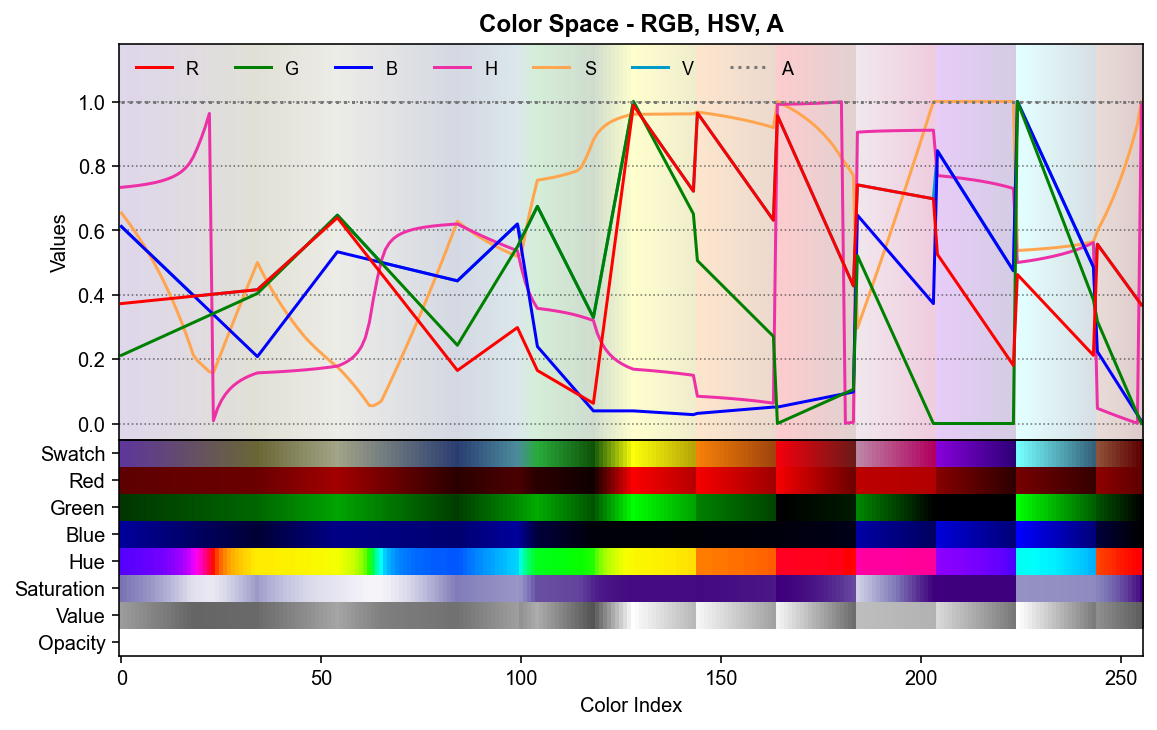

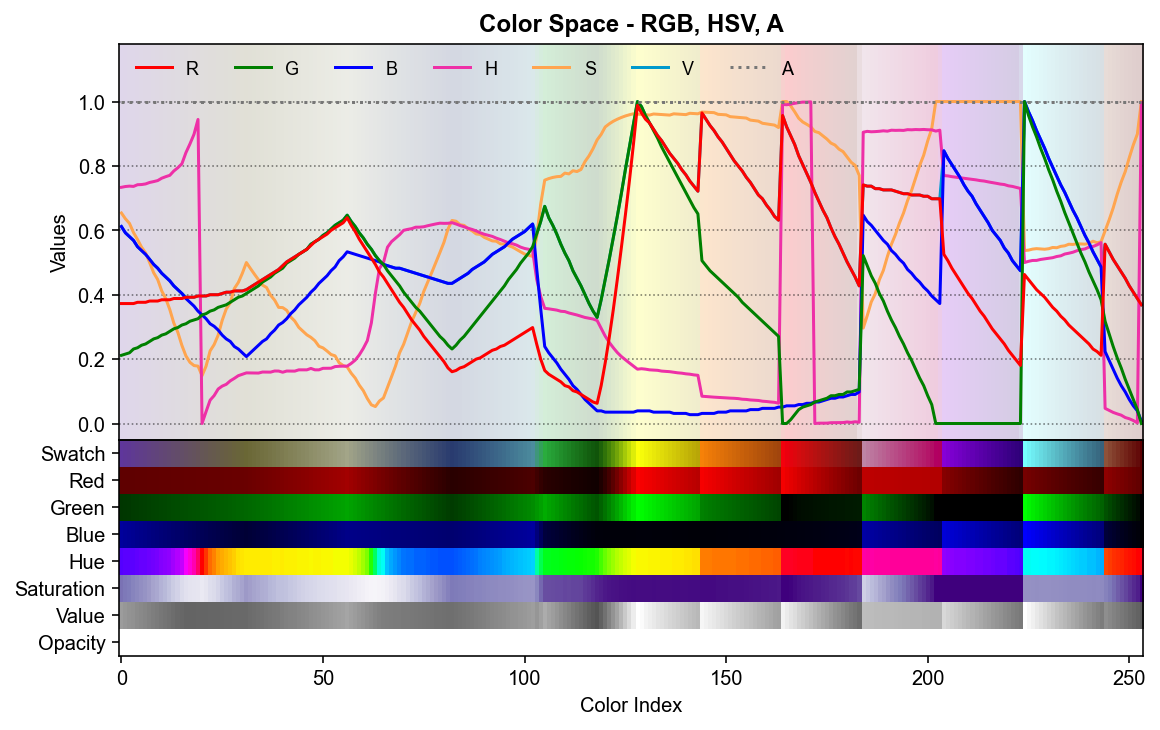

In [11]:
blib.colorspace(zmap)
blib.colorspace(np.array(z, dtype=float) / 255.0)

In [12]:
# blib.colorspace(blib.zmapext())

In [13]:
v = identify('blob/radarscope-v.png')
v.shape

(255, 4)

In [14]:
w = identify('blob/radarscope-w.png')
w.shape

(243, 4)

# D - Differential Reflectivity

In [15]:
d = identify('blob/radarscope-d.png')
d.shape

(191, 4)

In [16]:
# Inspect a snippet of the color codes
np.array(d[150:180, :], dtype=float) / 255.0

array([[0.7333, 0.1059, 0.2157, 1.    ],
       [0.749 , 0.1333, 0.2588, 1.    ],
       [0.7725, 0.1647, 0.302 , 1.    ],
       [0.7961, 0.1922, 0.3412, 1.    ],
       [0.8157, 0.2235, 0.3882, 1.    ],
       [0.8392, 0.251 , 0.4353, 1.    ],
       [0.8588, 0.2784, 0.4824, 1.    ],
       [0.8824, 0.3098, 0.5333, 1.    ],
       [0.902 , 0.3412, 0.5843, 1.    ],
       [0.9255, 0.3725, 0.6392, 1.    ],
       [0.949 , 0.4078, 0.6902, 1.    ],
       [0.949 , 0.4235, 0.702 , 1.    ],
       [0.949 , 0.4431, 0.7098, 1.    ],
       [0.949 , 0.4588, 0.7176, 1.    ],
       [0.9569, 0.4784, 0.7294, 1.    ],
       [0.9569, 0.4941, 0.7373, 1.    ],
       [0.9569, 0.5176, 0.7451, 1.    ],
       [0.9569, 0.5373, 0.7608, 1.    ],
       [0.9608, 0.5529, 0.7686, 1.    ],
       [0.9608, 0.5725, 0.7804, 1.    ],
       [0.9608, 0.5922, 0.7882, 1.    ],
       [0.9608, 0.6078, 0.7961, 1.    ],
       [0.9686, 0.6314, 0.8078, 1.    ],
       [0.9686, 0.651 , 0.8196, 1.    ],
       [0.9686, 

In [17]:
def d2i(v):
    return np.floor(v * 10 + 100) / 255.0

In [18]:
xp = [0, d2i(-4), d2i(0), d2i(0.5), d2i(1.0), d2i(1.5), d2i(2.0), d2i(2.5), d2i(3), d2i(4), d2i(5), d2i(6), d2i(8),
      1]
cp = [
    [0.0   , 0.0   , 0.0   , 1.0],  # -X dB    black
    [0.0   , 0.0   , 0.0   , 1.0],  # -4 dB    black
    [0.7412, 0.7412, 0.7412, 1.0],  # 0        gray
    [0.    , 0.    , 0.5255, 1.0],  # 0.5      dark blue
    [0.1255, 0.5216, 0.7882, 1.0],  # 1.0
    [0.251 , 1.    , 0.7843, 1.0],  # 1.5      cyan
    [0.298 , 0.8471, 0.2706, 1.0],  # 2.0      green
    [1.    , 1.    , 0.3059, 1.0],  # 2.5      yellow
    [0.9922, 0.5412, 0.2235, 1.0],  # 3.0      orange
    [0.8392, 0.    , 0.051 , 1.0],  # 4.0      red
    [0.6118, 0.    , 0.0118, 1.0],  # 5.0      dark red
    [0.9255, 0.3725, 0.6392, 1.0],  # 6.0      pink
    [1.0   , 1.    , 1.    , 1. ],  # 8.0      white
    [1.0   , 1.0   , 1.0   , 1.0]   #          white
]
dmap = blib.fleximap(256, xp, cp)

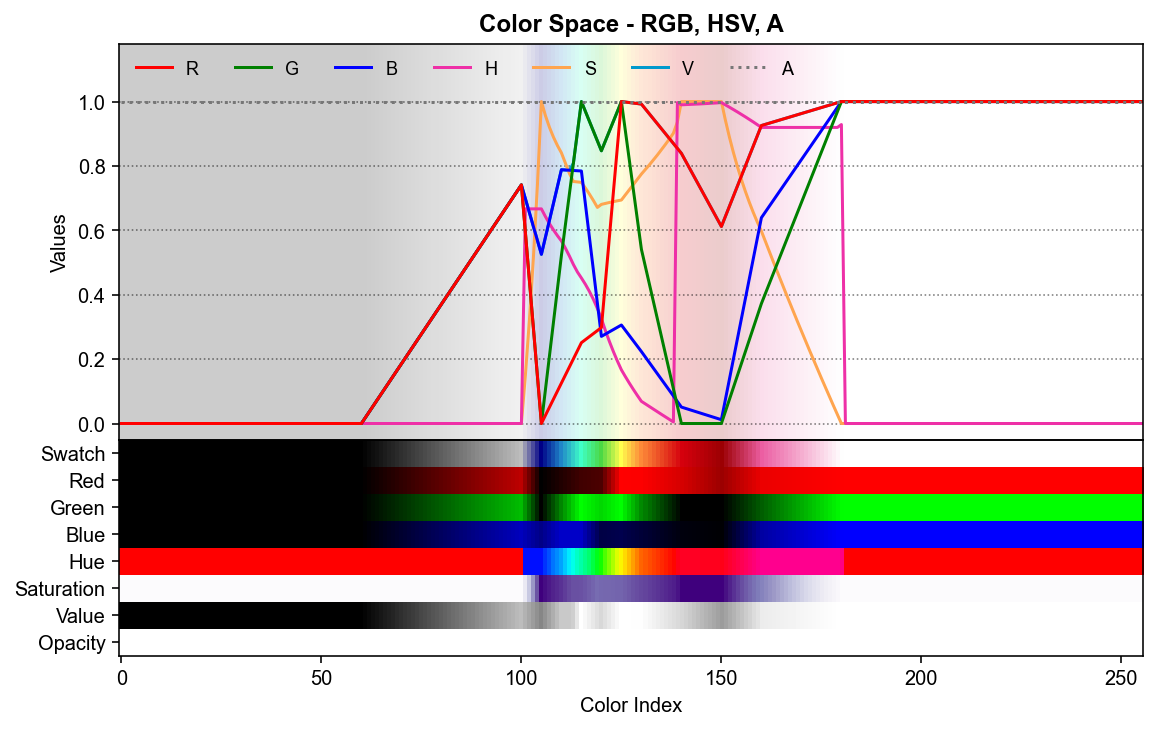

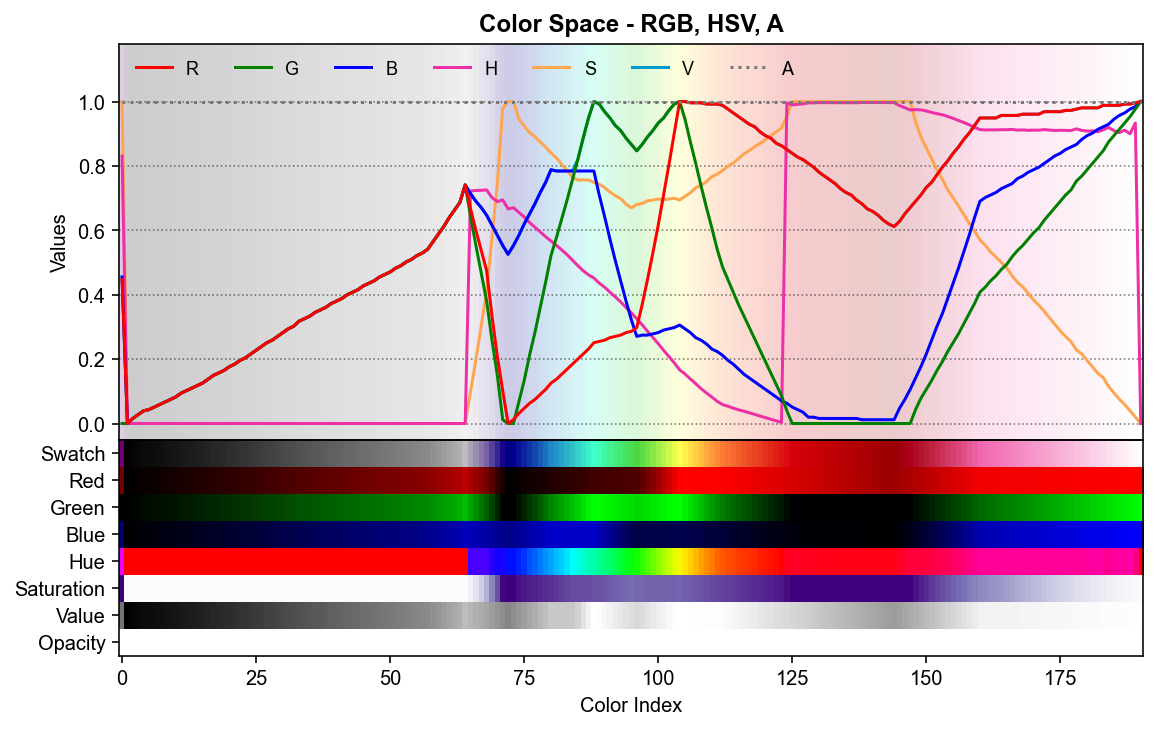

In [19]:
blib.colorspace(dmap)
blib.colorspace(np.array(d, dtype=float) / 255.0)

# R - RhoHV

In [20]:
r = identify('blob/radarscope-r.png')
r.shape

(236, 4)

In [21]:
# Inspect a snippet of the color codes
np.array(r[215:, :], dtype=float) / 255.0

array([[0.9882, 0.4549, 0.0392, 1.    ],
       [0.9882, 0.1922, 0.0314, 1.    ],
       [0.9843, 0.0549, 0.0275, 1.    ],
       [0.8941, 0.    , 0.0235, 1.    ],
       [0.851 , 0.    , 0.0196, 1.    ],
       [0.6471, 0.    , 0.0118, 1.    ],
       [0.5569, 0.    , 0.0078, 1.    ],
       [0.5255, 0.    , 0.1686, 1.    ],
       [0.5137, 0.    , 0.2667, 1.    ],
       [0.5725, 0.    , 0.3294, 1.    ],
       [0.6039, 0.0706, 0.3647, 1.    ],
       [0.6667, 0.1608, 0.4314, 1.    ],
       [0.698 , 0.2039, 0.4667, 1.    ],
       [0.7608, 0.2941, 0.5412, 1.    ],
       [0.7922, 0.3412, 0.5804, 1.    ],
       [0.8275, 0.3882, 0.6157, 1.    ],
       [0.8588, 0.4392, 0.6549, 1.    ],
       [0.8941, 0.4902, 0.698 , 1.    ],
       [0.9294, 0.5412, 0.7373, 1.    ],
       [0.9686, 0.5961, 0.7804, 1.    ],
       [1.    , 1.    , 1.    , 1.    ]])

In [22]:
# function rho2ind(value) {
#   if (value > 0.93) return Math.round(value * 1000.0 - 824.0);
#   if (value > 0.7) return Math.round(value * 300.0 - 173.0);
#   return Math.round(value * 52.8751);
# }

def r2i(v):
    if v > 0.93:
        return np.round(v * 1000. - 824.) / 255.
    elif v > 0.7:
        return np.round(v * 300. - 173.) / 255.
    return np.round(v * 52.8751) / 255.

In [23]:
xp = [0, r2i(0.2), r2i(0.455), r2i(0.66), r2i(0.72), r2i(0.8), r2i(0.85), r2i(0.9), r2i(0.95), r2i(0.97), r2i(0.99), r2i(1.02),  1]
cp = [
    [0.0   , 0.0   , 0.0   , 1.0],  # < 0.2    black
    [0.0   , 0.0   , 0.0   , 1.0],  # 0.2      black
    [0.5137, 0.5059, 0.5412, 1.0],  # 0.455    gray
    [0.0706, 0.    , 0.4745, 1. ],  # 0.66     dark blue
    [0.0196, 0.    , 0.8157, 1. ],  # 0.72     blue
    [0.4627, 0.4392, 0.8   , 1. ],  # 0.80     light blue
    [0.3255, 1.    , 0.2784, 1. ],  # 0.85     green
    [0.5098, 0.7843, 0.0275, 1. ],  # 0.90     dark green
    [0.9961, 0.7255, 0.0353, 1. ],  # 0.95     yellow
    [0.8941, 0.    , 0.0235, 1. ],  # 0.97     red
    [0.5137, 0.    , 0.2667, 1. ],  # 0.99     dark pink red
    [1.    , 1.    , 1.    , 1. ],  # 1.       white
    [1.    , 1.    , 1.    , 0. ],  # 1.05     clear
]
rmap = blib.fleximap(256, xp, cp)

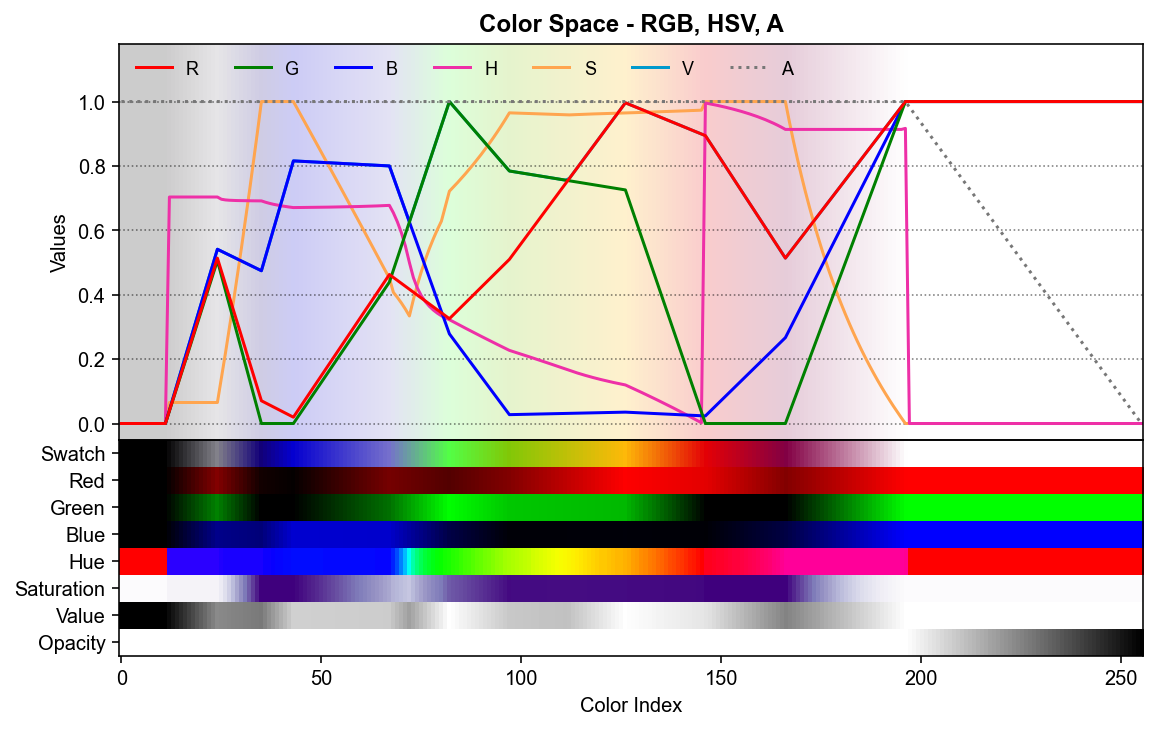

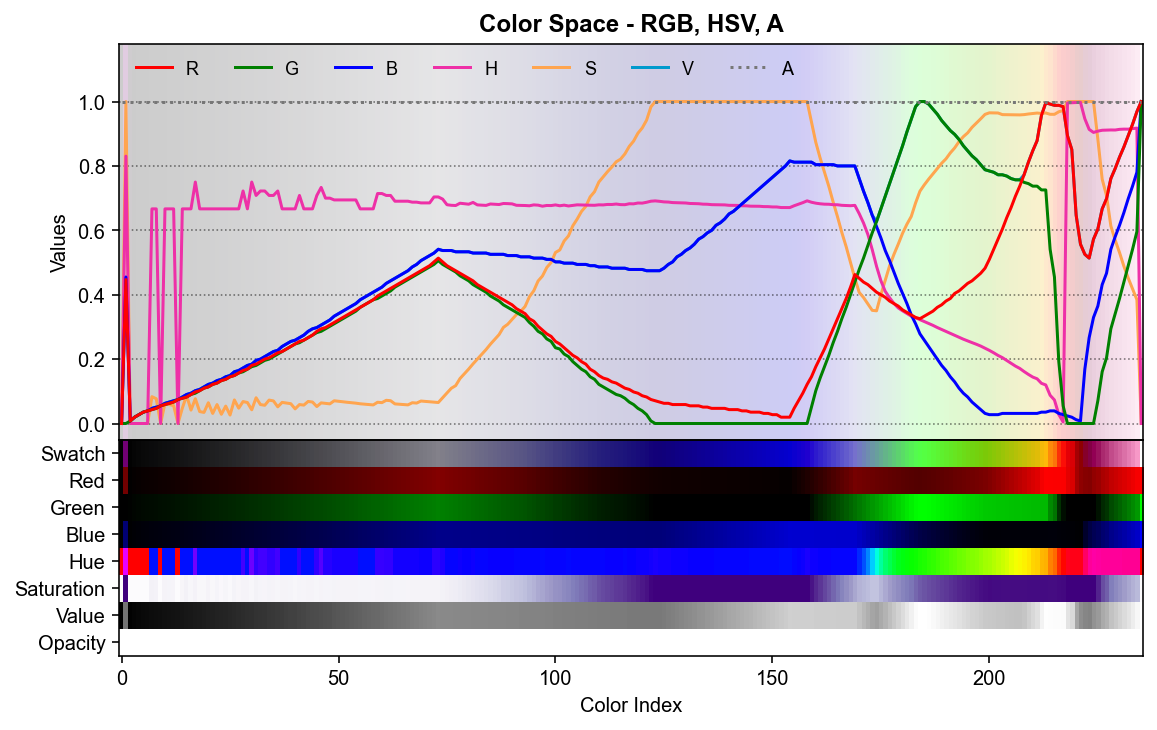

In [24]:
blib.colorspace(rmap)
blib.colorspace(np.array(r, dtype=float) / 255.0)